<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(1_2)_n120_01_ipynb1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.692647,31.370177,82.970570,4.135572,195.168967,190.904448,4.264518
1,0.0,1.0,69.487556,74.006214,42.471009,-17.583185,178.381593,195.881572,-17.499979
2,0.0,2.0,39.739806,90.015664,51.120392,7.971194,198.847057,193.252291,5.594766
3,0.0,3.0,35.205702,53.235243,65.325039,-16.074282,147.691702,166.218706,-18.527004
4,0.0,4.0,70.706908,69.308830,39.232894,1.746723,190.995356,189.023935,1.971420
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.268114,64.322642,93.875938,-0.029562,222.437133,221.517435,0.919697
119996,999.0,116.0,43.739899,38.662709,41.433066,9.524637,143.360311,134.486036,8.874275
119997,999.0,117.0,98.405914,44.730050,98.374201,2.251711,253.761876,248.878190,4.883686
119998,999.0,118.0,31.185206,28.501604,97.745562,7.682309,175.114681,165.178485,9.936195


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.692647,31.370177,82.970570,4.135572,195.168967,190.904448,4.264518
1,0.0,1.0,69.487556,74.006214,42.471009,-17.583185,178.381593,195.881572,-17.499979
2,0.0,2.0,39.739806,90.015664,51.120392,7.971194,198.847057,193.252291,5.594766
3,0.0,3.0,35.205702,53.235243,65.325039,-16.074282,147.691702,166.218706,-18.527004
4,0.0,4.0,70.706908,69.308830,39.232894,1.746723,190.995356,189.023935,1.971420
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.268114,64.322642,93.875938,-0.029562,222.437133,221.517435,0.919697
119996,999.0,116.0,43.739899,38.662709,41.433066,9.524637,143.360311,134.486036,8.874275
119997,999.0,117.0,98.405914,44.730050,98.374201,2.251711,253.761876,248.878190,4.883686
119998,999.0,118.0,31.185206,28.501604,97.745562,7.682309,175.114681,165.178485,9.936195


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    66.692647  31.370177  82.970570  ...  195.168967  190.904448   4.264518
      1.0    69.487556  74.006214  42.471009  ...  178.381593  195.881572 -17.499979
      2.0    39.739806  90.015664  51.120392  ...  198.847057  193.252291   5.594766
      3.0    35.205702  53.235243  65.325039  ...  147.691702  166.218706 -18.527004
      4.0    70.706908  69.308830  39.232894  ...  190.995356  189.023935   1.971420
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  54.268114  64.322642  93.875938  ...  222.437133  221.517435   0.919697
      116.0  43.739899  38.662709  41.433066  ...  143.360311  134.486036   8.874275
      117.0  98.405914  44.730050  98.374201  ...  253.761876  248.878190   4.883686
      118.0  31.185206  28.501604  97.745562  ...  175.114681  165.178485   9.936195
      119.0  85.736118  30.452380  69.594660  ...  195.164119  194.124909   1.039210

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    66.692647  31.370177  82.970570  ...  195.168967  190.904448   4.264518
      1.0    69.487556  74.006214  42.471009  ...  178.381593  195.881572 -17.499979
      2.0    39.739806  90.015664  51.120392  ...  198.847057  193.252291   5.594766
      3.0    35.205702  53.235243  65.325039  ...  147.691702  166.218706 -18.527004
      4.0    70.706908  69.308830  39.232894  ...  190.995356  189.023935   1.971420
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  54.268114  64.322642  93.875938  ...  222.437133  221.517435   0.919697
      116.0  43.739899  38.662709  41.433066  ...  143.360311  134.486036   8.874275
      117.0  98.405914  44.730050  98.374201  ...  253.761876  248.878190   4.883686
      118.0  31.185206  28.501604  97.745562  ...  175.114681  165.178485   9.936195
      119.0  85.736118  30.452380  69.594660  ...  195.164119  194.124909   1.039210

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.692647,31.370177,82.970570,4.135572,195.168967,190.904448,4.264518
1,0.0,1.0,69.487556,74.006214,42.471009,-17.583185,178.381593,195.881572,-17.499979
2,0.0,2.0,39.739806,90.015664,51.120392,7.971194,198.847057,193.252291,5.594766
3,0.0,3.0,35.205702,53.235243,65.325039,-16.074282,147.691702,166.218706,-18.527004
4,0.0,4.0,70.706908,69.308830,39.232894,1.746723,190.995356,189.023935,1.971420
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.268114,64.322642,93.875938,-0.029562,222.437133,221.517435,0.919697
119996,999.0,116.0,43.739899,38.662709,41.433066,9.524637,143.360311,134.486036,8.874275
119997,999.0,117.0,98.405914,44.730050,98.374201,2.251711,253.761876,248.878190,4.883686
119998,999.0,118.0,31.185206,28.501604,97.745562,7.682309,175.114681,165.178485,9.936195


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    66.692647  31.370177  82.970570  ...  195.168967  190.904448   4.264518
      1.0    69.487556  74.006214  42.471009  ...  178.381593  195.881572 -17.499979
      2.0    39.739806  90.015664  51.120392  ...  198.847057  193.252291   5.594766
      3.0    35.205702  53.235243  65.325039  ...  147.691702  166.218706 -18.527004
      4.0    70.706908  69.308830  39.232894  ...  190.995356  189.023935   1.971420
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  54.268114  64.322642  93.875938  ...  222.437133  221.517435   0.919697
      116.0  43.739899  38.662709  41.433066  ...  143.360311  134.486036   8.874275
      117.0  98.405914  44.730050  98.374201  ...  253.761876  248.878190   4.883686
      118.0  31.185206  28.501604  97.745562  ...  175.114681  165.178485   9.936195
      119.0  85.736118  30.452380  69.594660  ...  195.164119  194.124909   1.039210

[120000 rows x 7 columns]

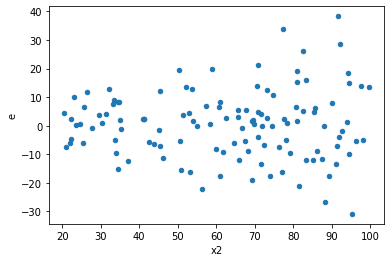

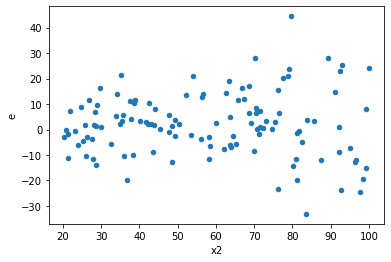

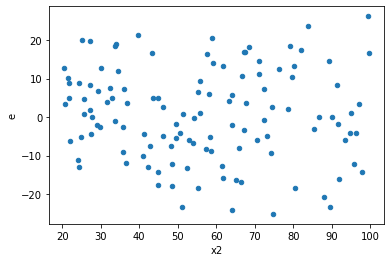

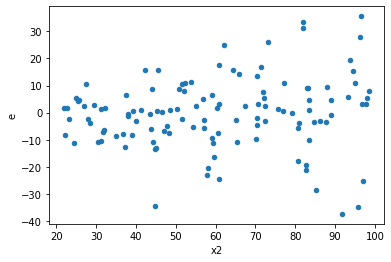

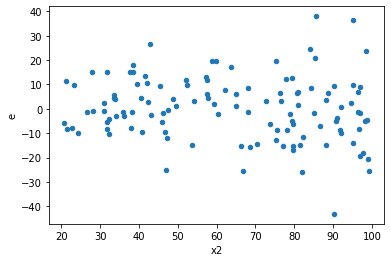

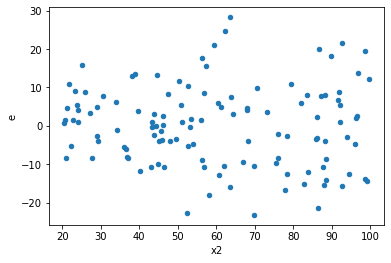

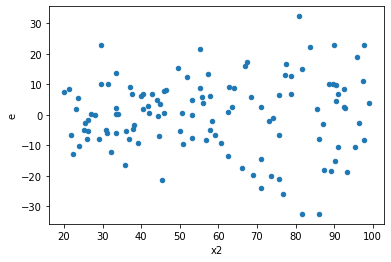

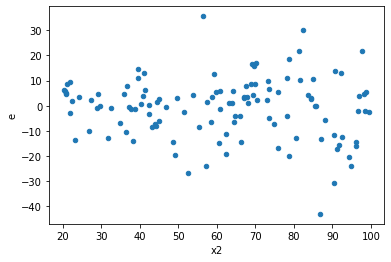

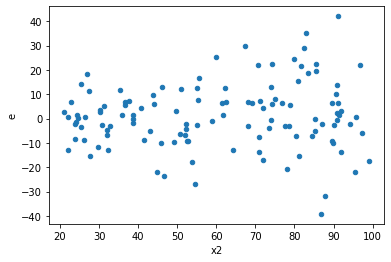

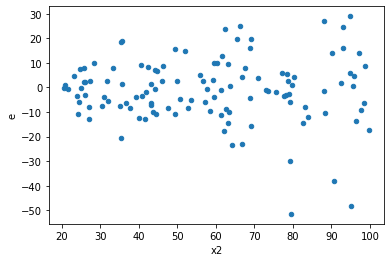

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,3563.8907942545293,10123.678969027285,79.19757320565621,224.9706437561619,2.8406254718433055,0.0006538953917243351,0.9996730523041378,0.00032694769586216754,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,3090.8569059227625,11225.847597950225,68.68570902050584,249.46327995444946,3.6319531895633954,3.09653378771646e-05,0.9999845173310614,1.54826689385823e-05,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,4255.29005641969,8047.773356246947,94.56200125377089,178.83940791659882,1.891239668634521,0.03502929979208669,0.9824853501039567,0.017514649896043344,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,3506.9440373083835,11831.174463409156,77.93208971796408,262.914988075759,3.3736422188503776,8.110689962870232e-05,0.9999594465501856,4.055344981435116e-05,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,4302.810371264797,10308.03657546011,95.61800825032883,229.0674794546691,2.39565207063264,0.004106062766529028,0.9979469686167355,0.002053031383264514,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,2337.355393245099,5858.29916117125,51.941230961002205,130.18442580380554,2.5063792943518957,0.0025816080220137927,0.9987091959889931,0.0012908040110068963,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,3228.159221584958,11213.11993978819,71.73687159077684,249.18044310640423,3.473533729319208,5.568012042611592e-05,0.9999721599397869,2.784006021305796e-05,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,4481.379754434306,8765.382735188246,99.5862167652068,194.78628300418325,1.9559562490804172,0.026597184889443515,0.9867014075552782,0.013298592444721757,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,3608.467935793641,12042.393828368056,80.1881763509698,267.6087517415124,3.337259480378193,9.31262936607613e-05,0.9999534368531696,4.656314683038065e-05,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,3563.8907942545293,10123.678969027285,79.19757320565621,224.9706437561619,2.8406254718433055,0.0006538953917243351,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,3090.8569059227625,11225.847597950225,68.68570902050584,249.46327995444946,3.6319531895633954,3.09653378771646e-05,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,4255.29005641969,8047.773356246947,94.56200125377089,178.83940791659882,1.891239668634521,0.03502929979208669,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,3506.9440373083835,11831.174463409156,77.93208971796408,262.914988075759,3.3736422188503776,8.110689962870232e-05,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,4302.810371264797,10308.03657546011,95.61800825032883,229.0674794546691,2.39565207063264,0.004106062766529028,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,2337.355393245099,5858.29916117125,51.941230961002205,130.18442580380554,2.5063792943518957,0.0025816080220137927,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,3228.159221584958,11213.11993978819,71.73687159077684,249.18044310640423,3.473533729319208,5.568012042611592e-05,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,4481.379754434306,8765.382735188246,99.5862167652068,194.78628300418325,1.9559562490804172,0.026597184889443515,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,3608.467935793641,12042.393828368056,80.1881763509698,267.6087517415124,3.337259480378193,9.31262936607613e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    749
Reject001=1 : Homoscedasticity      251
Name: Result_test, dtype: int64